# Analiza wyników z nowożytnych Igrzysk Olimpijskich
###### Michał Banaszczak 311175
---

#### Załadowanie potrzebnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram

In [8]:
allScores = pd.read_csv('../data/scoresFromAllGames.csv', sep=';')

winterScores = allScores.loc[allScores['Type'] == 'Winter']
summerScores = allScores.loc[allScores['Type'] == 'Summer']

print(f'Wszystkie wiersze: {allScores.shape[0]}\nWiersze z letnich IO: {summerScores.shape[0]}\nWiersze z zimowych IO: {winterScores.shape[0]}')
summerScores.head()

Wszystkie wiersze: 162473
Wiersze z letnich IO: 118157
Wiersze z zimowych IO: 44316


,Host,Year,Type,Sport,Event,Place,Country,Participant,Result
3785,Tokyo,2020,Summer,3x3 Basketball,Men,1.0,Latvia,Team discipline,NaN
3786,Tokyo,2020,Summer,3x3 Basketball,Men,2.0,Russian Olympic Committee,Team discipline,NaN
3787,Tokyo,2020,Summer,3x3 Basketball,Men,3.0,Serbia,Team discipline,NaN
3788,Tokyo,2020,Summer,3x3 Basketball,Men,4.0,Belgium,Team discipline,NaN
3789,Tokyo,2020,Summer,3x3 Basketball,Men,5.0,Netherlands,Team discipline,NaN


Text(0.5, 1.0, 'Ilość dyscyplin na zimowych IO')

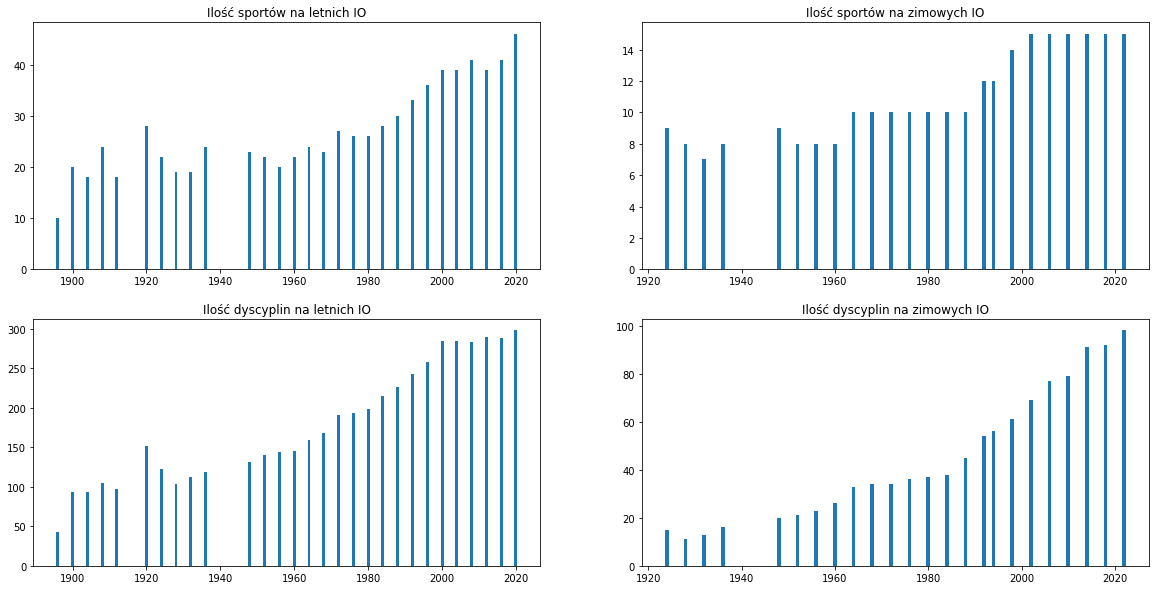

In [9]:
def DFdistinctColumnByYear(inScoresDF, inCol):
	outDict = dict()
	for year in set(inScoresDF['Year']):
		outDict[year] = len(set(inScoresDF[~inScoresDF[inCol]
							.where(inScoresDF['Year'] == year).isnull()][inCol]))

	return pd.DataFrame.from_dict(data=outDict, orient='index', columns=[f'nOf{inCol}s']).sort_index()
	
sSports = DFdistinctColumnByYear(summerScores, 'Sport')
wSports = DFdistinctColumnByYear(winterScores, 'Sport')
sEvents = DFdistinctColumnByYear(summerScores, 'Event')
wEvents = DFdistinctColumnByYear(winterScores, 'Event')


plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.bar(sSports.index, sSports['nOfSports'])
plt.title('Ilość sportów na letnich IO')
plt.subplot(2,2,2)
plt.bar(wSports.index, wSports['nOfSports'])
plt.title('Ilość sportów na zimowych IO')
plt.subplot(2,2,3)
plt.bar(sEvents.index, sEvents['nOfEvents'])
plt.title('Ilość dyscyplin na letnich IO')
plt.subplot(2,2,4)
plt.bar(wEvents.index, wEvents['nOfEvents'])
plt.title('Ilość dyscyplin na zimowych IO')

#### letnie IO
roznorodnosc sportow wzrosla ponad czterokrotnie w od pierwszych nowozytnuch IO
roznorodnosc poszczegolnych dyscyplin wzrosla szesciokrotnie na przestrzeni ubieglego wieku -> dla istniejacych juz sportow pojawialo sie co raz wiecej nowych dyscyplin
trend ten tak naprawde jednak zaczal sie dopiero po wojnie, przez pierwsze 10 edycji nie obeswujemy specjalnego wzrosu
#### ziomowe IO
ilosc sportow na zimowych IO byla przedzialami stala, tylko w pewnych momentach zwiekszano liczbe, jest ich jednak zdecydowanie mniej niz na letnich igrzystakch.

### ciekawe rzeczy do policzenia
1. ilosc zlotych medali w zaleznosci od panstwa
2. ilosc wszystkich medalistow w zaleznosci od panstwa
3. panstwa bez zadnych medalistow
4. ilosc DNS oraz DNF w czasie
5. skutki (spadek w wynikach) dla rosyjskich zawodnikow po aferze dopingowej
6. wyniki panstw ZSRR przed i po jego rozpadzie
7. wyniki panstw jugoslawii przed i po rozpadzie
8. wyniki czechoslowacji w porownaniu do wynikow czech i slowacji (wyniki = ilosc medalistow / srednie miejsce)
9. ilosc medali wzgledem kontynentu

jak starczy czasu to 1-4 lacznie i w rozroznieniu na lato/zima

Złote medale zdobyte przez polskich sportowców:
+ w letnich IO: 72
+ w zimowych IO: 7
+ łącznie: 79


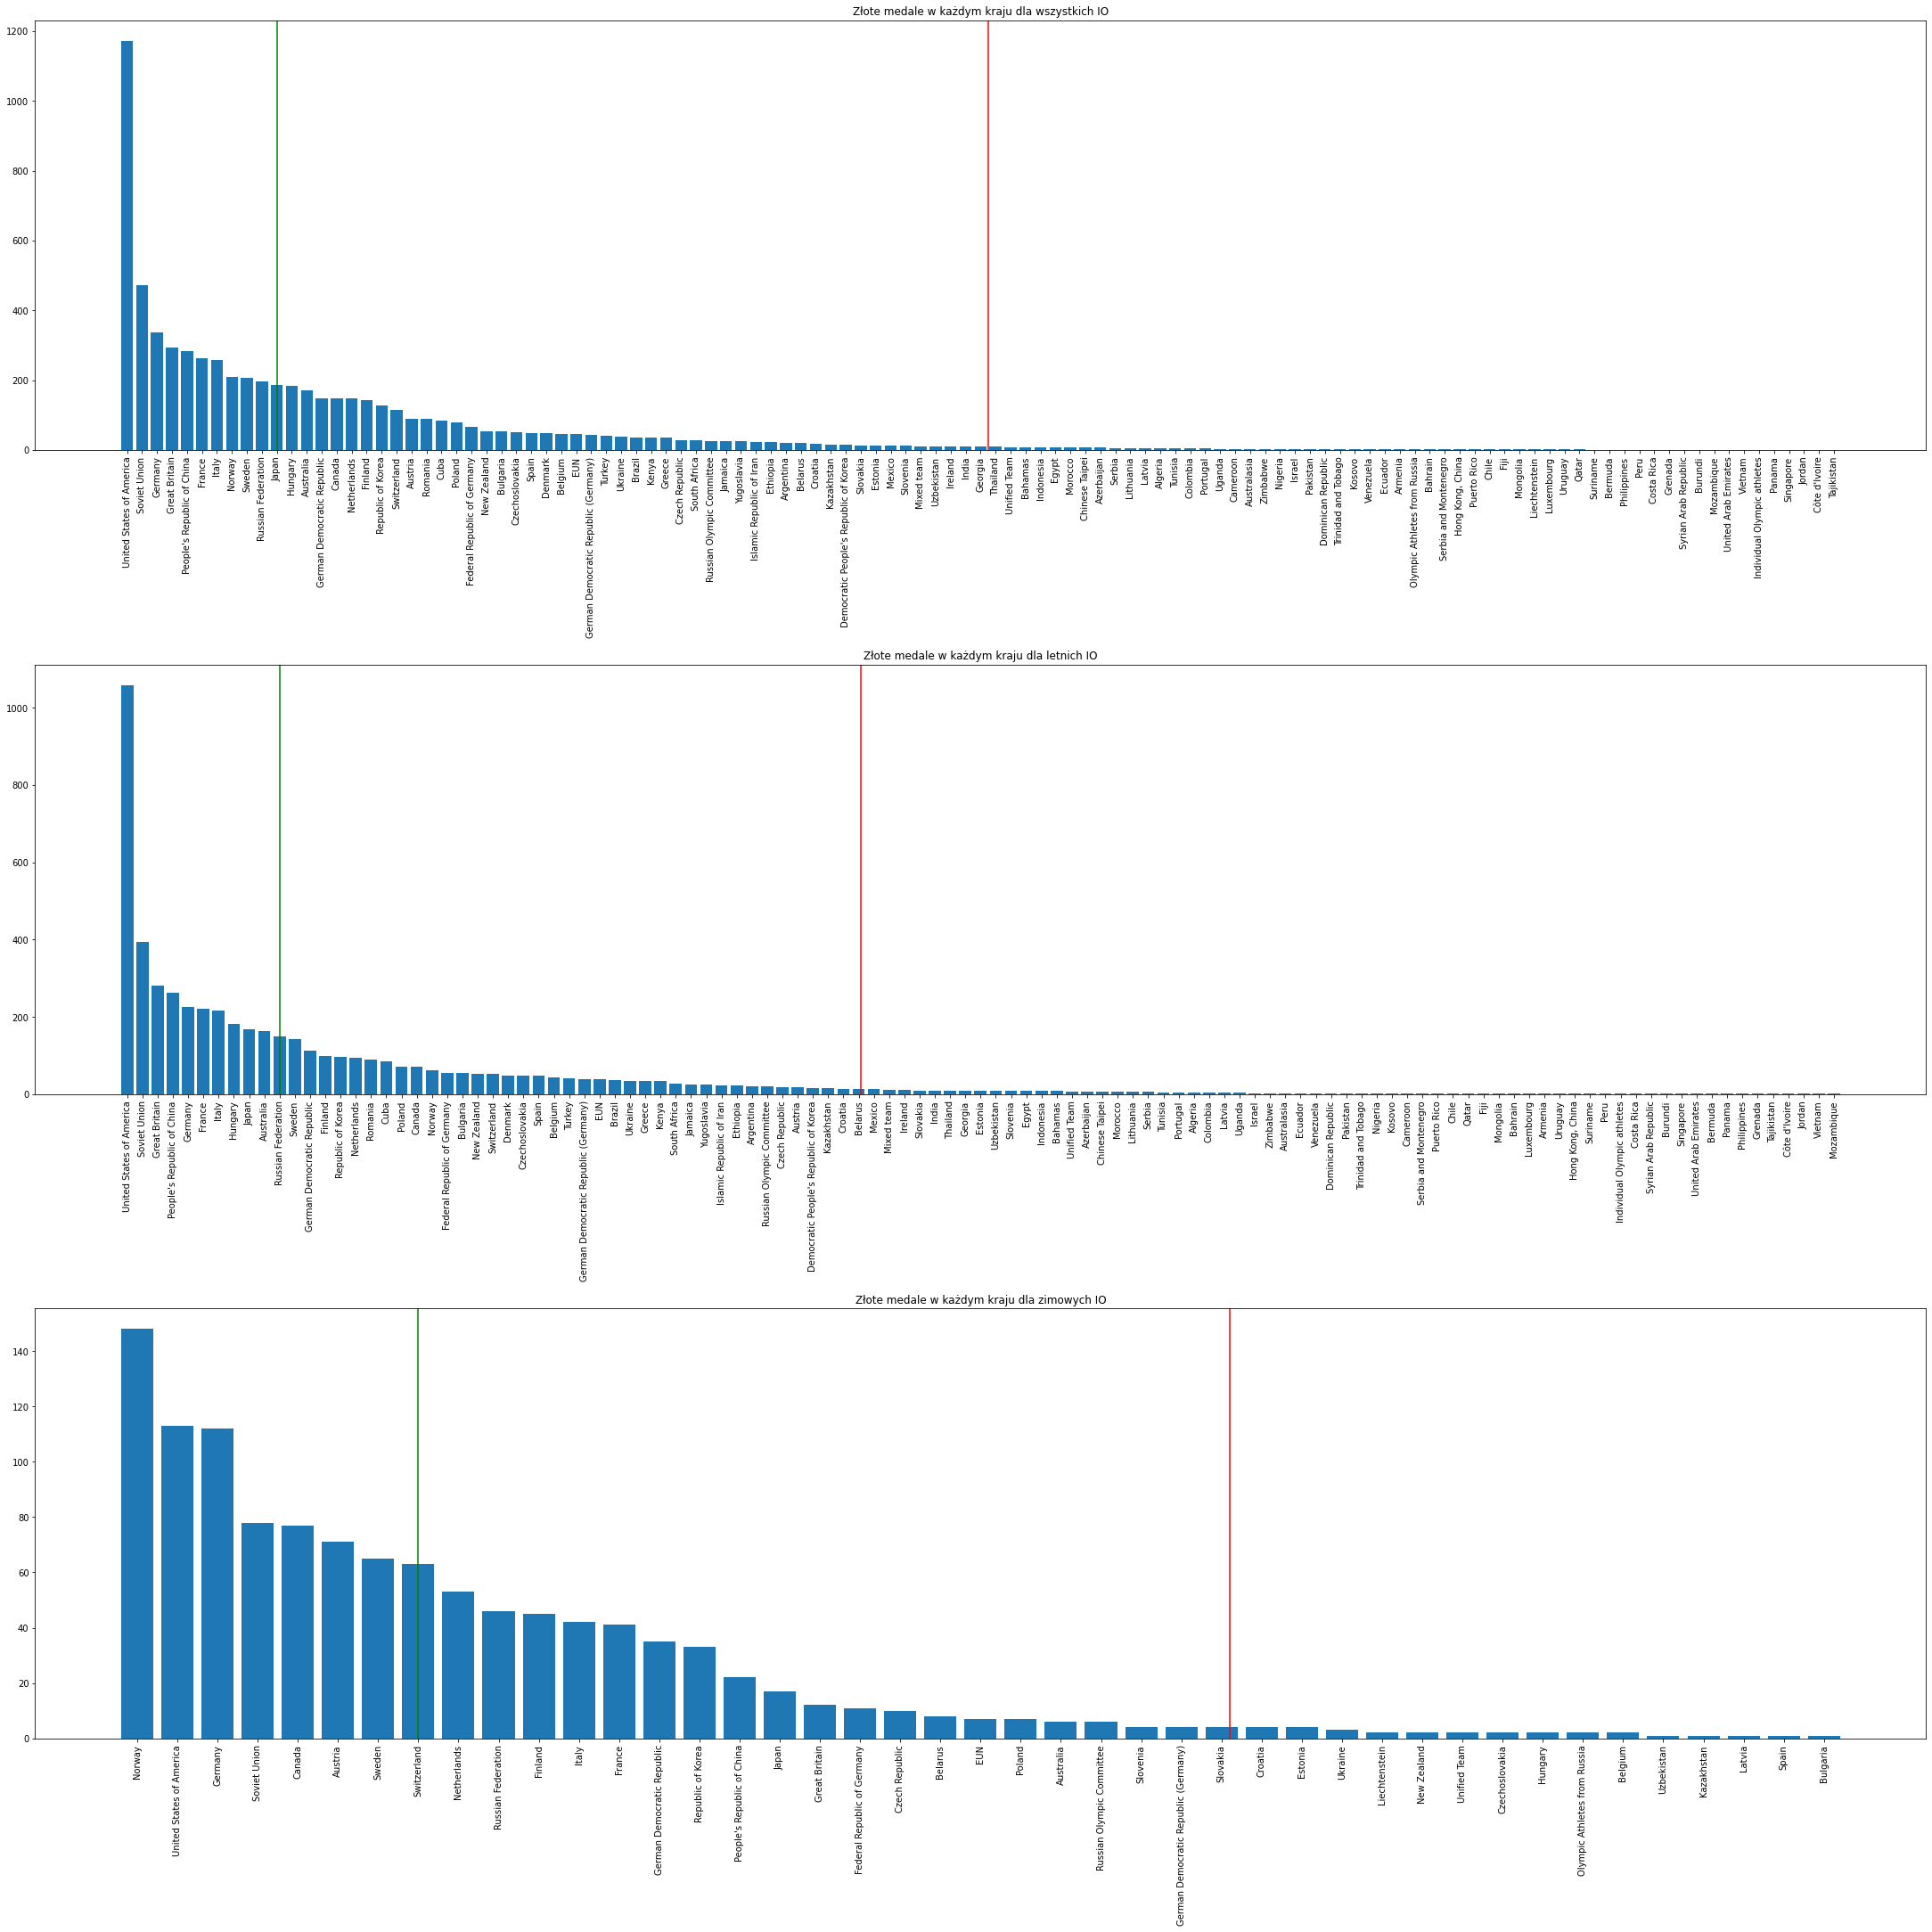

In [83]:
def goldMedalsByCountry(inScoresDF):
	return inScoresDF[~inScoresDF.Country.where(inScoresDF.Place == 1).isnull()].Country.value_counts()

aGoldByCountry = goldMedalsByCountry(allScores)
sGoldByCountry = goldMedalsByCountry(summerScores)
wGoldByCountry = goldMedalsByCountry(winterScores)

print(f'Złote medale zdobyte przez polskich sportowców:\n+ w letnich IO: {sGoldByCountry.Poland}\n+ w zimowych IO: {wGoldByCountry.Poland}\n+ łącznie: {aGoldByCountry.Poland}')

plt.figure(figsize = (30,30), constrained_layout = True)
for i, df in enumerate([aGoldByCountry, sGoldByCountry, wGoldByCountry]):
	plt.subplot(3,1,i+1)
	plt.bar(df.keys(), df.values)
	plt.xticks(rotation=90)
	if i == 0: 	 plt.title('Złote medale w każdym kraju dla wszystkich IO')
	elif i == 1: plt.title('Złote medale w każdym kraju dla letnich IO')
	else: 		 plt.title('Złote medale w każdym kraju dla zimowych IO')
	plt.axvline(df.median(), color='green')
	plt.axvline(df.mean(), color='red')
	# green -> median, red -> mean